<a href="https://colab.research.google.com/github/mcallara/probabilistic-forecasting-for-planning-101/blob/main/Probabilistic_Forecasting_for_Planning_101_Part_I_%5BMatias%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilistic Forecasting for Planning 101

**Applied Machine Learning Days (AMLD) 2024**  
Sunday, March 24, 2024  
from 14h00 to 15h30 and from 16h00 t0 17h30 CET  

## Authors
- Stephanie Brückner  
- Matias Callara  
- Patric Hammler  
- Nicolar Riesterer  


## Workshop content details

Join us to explore the fundamental concepts of combining probabilistic forecasting and optimization techniques to make more informed planning decisions. This is a relaxed-paced workshop that only requires basic Python programming experience and focuses on the exploration of key ideas for building and evaluating a planning system. These concepts are applicable in various domains such as retail, energy demand planning, or capacity planning.

This workshop serves as the ideal companion for gaining a solid understanding of the core ideas presented in the Forecasting & Decision Intelligence track.

## Learning objective for participants

- Understand the Conceptual Framework
- Identify Forecasting Problems
- Differentiate between Point and Probabilistic Forecasting
- Explore Probabilistic Forecasting Models
- Familiarize yourself with popular tools
- Make Planning Decisions with Probabilistic Forecasts
- Understand Intrinsic and Extrinsic Performance Evaluation
- Explore Baselines for Comparison
- Learn about Sequential Decisions in Planning
- Recognize Limitations

## Target audience

This session is designed for individuals interested in acquiring fundamental knowledge to build, assess, and enhance planning systems by harnessing modern forecasting techniques.

Basic Python programming experience and a basic understanding of statistics are required.

# Introduction

In the business context, forecasting is a means to an end [1]. We generate forecasts to support our decision making process. In this context, we care about the value we generate with our decisions. Unfortunately, even a "perfect" forecast is useless if we don't leverage it to make the right decisions.

## Levels of organizational planning

This workshop will focus on using forecasts to improve organizational planning. This cover a great number of decisions and activities that we cluster in 3 groups:

**Strategic decisions** and activities are concerned with the long-term direction and overall purpose of the organization.
They involve setting goals, defining objectives, and formulating plans to achieve sustainable competitive advantage and fulfill the company's mission.  
Strategic decisions often involve choices related to market positioning, product development, diversification, mergers and acquisitions, and entering new markets.

**Tactical decisions** and activities bridge the gap between strategic planning and daily operations.
They involve medium-term planning and aim to translate the broader strategic objectives into specific actions and initiatives.
Tactical decisions often involve allocating resources, setting targets, and coordinating various operational activities to achieve specific goals.  
Examples of tactical initiatives include marketing campaigns, workforce planning, supply chain optimization, and pricing strategies.

**Operational decisions** and activities are concerned with the day-to-day functioning of the organization.
These decisions are typically short-term and involve the execution of tasks necessary to meet the immediate needs of the business.  
Examples of operational activities include production scheduling, inventory management, customer service, and routine administrative tasks.

## Types of Business Forecasting Problems

Associated to each level of organizational planning, we can see different types of forecasting problems[2] with distinct Forecast Horizons, Granularity, Scale, Latency Requirements, Consumers of the Forecast, Characteristics of the Time Series, Drivers and Form of Forecast.

**Strategic forecasting** involves long-term predictions with limited data, where traditional data-driven methods like neural networks might not be sufficient due to data scarcity or the challenge of modeling long-term trends accurately. Instead, a model-based approach that transparently incorporates assumptions and addresses causality is preferable. This kind of forecasting problems usually benefit from econometric and statistical expertise.

**Tactical Forecasting** lies between strategic and operational forecasting, requiring a balanced approach that considers the volatility of data and the specificity of the problem. It demands a mix of skills and systems from both strategic and operational forecasting domains.

**Operational Forecasting** deals with short-term predictions across numerous time series, usually with minimal human interaction. Here, data-driven methods, including black-box models like deep learning, are more common due to the availability of historical data.
Machine monitoring to replace human oversight is critical in order to be able to provide insights when issues arise. Skills in software development and data analysis are crucial for managing the scale of these operations.

Note:
Despite the tendency to treat these problems as independent, the interactions between the three levels are complex and can significantly impact overall forecasting effectiveness.

Note:
Successful planning involves much more than just making good decisions. There are many aspects like stakeholder management, change management, proper execution and monitoring, among others (but we will focus just on the quantitative aspect of it). But, in the workshop, we will focus on the algorithmic and quantitative part of the problem.

### Business Forecasting Examples

Let's see some concrete examples.

**Strategic Forecasting for Strategic Planning**

Scenario: A multinational corporation is considering **entering a new market** within the next five years and wants to forecast the long-term potential of this market. The market is in a country with emerging technologies and fluctuating regulatory landscapes. Traditional data-driven methods are insufficient due to the scarcity of relevant historical data and the complexity of predicting how technology and regulations will evolve.

Approach: The corporation employs strategic forecasting, utilizing a model-based approach that incorporates expert analysis on geopolitical factors, technology adoption rates, and potential regulatory changes. Econometric models are developed to simulate various future scenarios, integrating expert opinions and global economic forecasts. This approach allows the corporation to understand a range of potential outcomes and their probabilities, helping in making informed decisions about whether to enter the market and how to approach it strategically.

**Tactical Forecasting for Capacity Planning**

Scenario: A hospital network is preparing for the upcoming flu season, which typically sees a surge in patient admissions. Effective staffing is crucial to maintain high-quality care while managing costs. The challenge lies in accurately **predicting the demand for medical staff** across various departments, considering the uncertainties of flu season severity, potential outbreaks of other illnesses, and varying patient volumes.

Approach: The hospital network employs tactical forecasting to address these staffing needs. This approach involves analyzing historical data on patient admissions during past flu seasons, current trends in health indicators, and predictive signals from public health agencies about the expected severity of the upcoming season. The forecasting model integrates this data with insights from recent medical research and local health trends to predict patient volume.

**Operational Forecasting for Inventory Management**

Scenario: An e-commerce platform with a vast catalog of products (SKUs) faces the challenge of **accurately predicting sales for each product** on a daily to weekly basis. Efficiently managing inventory levels and optimizing logistics for thousands of products requires precise, short-term sales forecasts to avoid stockouts and minimize overstock.

Approach: The platform adopts operational forecasting techniques, leveraging data-driven models to predict sales for each SKU. Historical sales data, including seasonality, promotions, price changes, and customer reviews, are analyzed using machine learning algorithms, particularly time-series forecasting models enhanced with deep learning for pattern recognition across similar product categories.

## Sequential Decision Making

All the discussed activities involve making quantitative decisions. In general, they are not one-off decisions but rather recurrent generating a sequence of decisions.

There are many fields dedicated to the study of optimizing the results of sequential decisions in the context of uncertainty of new information (e.g., reinforcement learning, stochastic programming, optimal control).

The diversity of frameworks can be very confusing and overwhelming. In particular, if you are a data scientist facing a planning problem for the first time.

Powell, W. B. (2022)[3], proposed a unifying framework to model this kind of problems and  identified 5 common elements of sequential decision making:

- State Variables ($S_t$): These encapsulate everything necessary for decision-making, including physical state variables ($R_t$), known parameters and quantities ($I_t$), and beliefs ($B_t$) about unknown parameters, all of which are essential for accurately modeling a problem.

- Decision Variables ($x_t$): These are variables over which decisions are made, ranging from binary choices to continuous values. Decision-making follows a policy ($X^π(S_t)$) that dictates how decisions are made based on the current state, within defined constraints.

- Exogenous Information ($W_{t+1}$): This refers to new information received after decisions are made, which was not previously known. It's external to the system being modeled and affects future states.

- Transition Function ($S^M(S_t, x_t, W_{t+1})$): This function updates the state variables based on current decisions and new exogenous information, capturing the dynamics of the system and enabling sequential learning.

- Objective Function: This aims to maximize the cumulative contributions (rewards or costs) over time, taking into account all types of uncertainties and the impact of decisions made according to the policy, which can be written as

\begin{equation}
\max_{\pi} \mathbb{E} \left\{ \sum_{t=0}^{T} C(S_t, X^{\pi}(S_t)) | S_0 \right\}.
\end{equation}

To make it more concrete, let's describe the corresponding elements for an inventory planning problem.

- State Variables ($S_t$):  
 - Physical State Variable ($R_t$): The current inventory level.
 - Beliefs ($B_t$): Forecasted demand for the upcoming period. This forecast is our belief about what the demand will be, but it's not known with certainty.
- Decision Variables ($x_t$):  
The number of units to stock for the next period, based on our policy. According to the policy mentioned, we decide to stock exactly as many units as our forecast indicates.
- Exogenous Information ($W_{t+1}$):  
Actual demand ($W_t$) for the period. This is the information that comes in after we have made our stocking decision, and it was unknown at the time of decision making.
- Transition Function ($S^M(S_t, x_t, W_{t+1})$):  
Updates the inventory level based on the stocking decision and actual demand. If the actual demand is less than or equal to the inventory, the remaining inventory is simply the initial stock minus the demand. If the demand exceeds the inventory, all inventory is sold.
- Objective Function:  
Maximize profit. In this simplified example, profit is calculated by selling the inventory at a fixed price per unit. The costs associated with ordering, holding, or shortages are not considered.


# Welcome to the Pharma Supply Chain Team!

During the workshop, we will imagine that we are fresh supply chain data scientists in a Pharma company and that we are assigned to an inventory planning problem. We got access to the data and we are ready to start exploring it.

## The Data

The dataset contains the daily sales of the drugs in 8 Anatomical Therapeutic Chemical (ATC) categories, by the single pharmacy store in period of 6 years (last year incomplete).

Sales data are resampled to the hourly, daily, weekly and monthly periods.

Data is already pre-processed, where processing included outlier detection and treatment and missing data imputation.

In [1]:
!git clone https://github.com/mcallara/pharma-sales-data

fatal: destination path 'pharma-sales-data' already exists and is not an empty directory.


Let's take a look into the weekly sales.

In [2]:
import pandas as pd
sales = pd.read_csv("pharma-sales-data/salesweekly.csv",parse_dates=["datum"],index_col="datum")

In [3]:
sales.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
datum,,,,,,,,
2014-01-05,14.00,11.67,21.3,185.95,41.0,0.0,32.0,7.0
2014-01-12,29.33,12.68,37.9,190.70,88.0,5.0,21.0,7.2
2014-01-19,30.67,26.34,45.9,218.40,80.0,8.0,29.0,12.0
2014-01-26,34.00,32.37,31.5,179.60,80.0,8.0,23.0,10.0
2014-02-02,31.02,23.35,20.7,159.88,84.0,12.0,29.0,12.0


<Axes: title={'center': 'R06 - Sales volume of antihistamines for systemic use'}, xlabel='datum'>

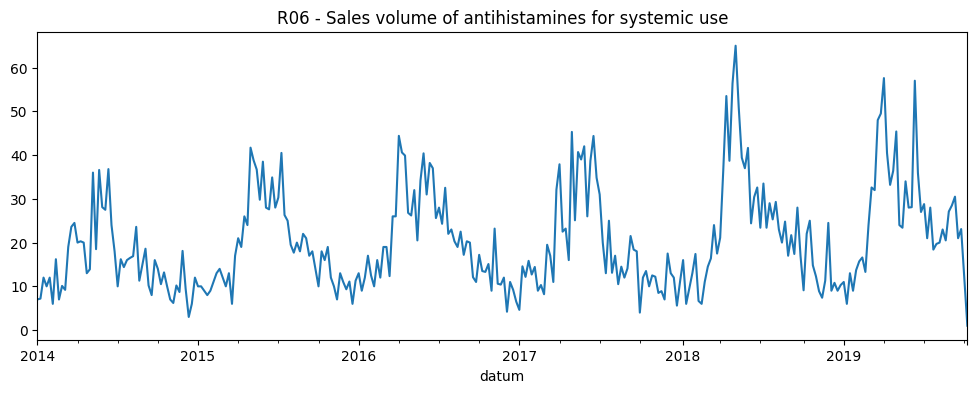

In [4]:
sales["R06"].plot(figsize=(12, 4),title="R06 - Sales volume of antihistamines for systemic use")

Our colleagues from the supply chain team, knowing that we are new to supply chain data science, have prepared some materials they believe will help us avoid common pitfalls.

# Point Forecasting

When people think about forecasting, they typically imagine predicting a future value for a certain variable or event. This kind of forecast that provides a single estimate for each time step in the forecast horizon is known as a 'point forecast'[4,5].

People often intuitively understand that the accuracy of a forecast is determined by the closeness of the predicted value to the actual result.  However, many are unaware of the wide range of options available for quantitatively measuring this error.

# Evaluating Forecast Accuracy

## Forecasting Errors

In the field of forecasting, these methods to measure the distance between the actuals and the forecast are known as forecasts errors. Let's deep dive into some of the most popular ways of measuring errors in the business context.

### Mean Squared Error (MSE)

Mean Squared Error (MSE) is a widely used metric for measuring the accuracy of a model in regression analysis. It calculates the average of the squares of the errors. The formula for MSE is given by:

\begin{equation}
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation}

where:
- $n$ is the number of observations,
- $y_i$ is the actual value of the observation,
- $\hat{y}_i$ is the predicted value.

MSE is always non-negative, and a value of 0 indicates a perfect fit. A smaller MSE value suggests a better fit of the model to the data. It is particularly sensitive to outliers because it squares the errors before averaging, thus giving higher weight to larger errors.

By taking the square root of the Mean Squared Error (MSE), we obtain the Root Mean Squared Error (RMSE). This transformation is particularly useful because it brings the error metric back to the same units as the variable we are forecasting.

### Mean Absolute Error (MAE)

Mean Absolute Error (MAE) is another metric used to evaluate the accuracy of a regression model. It measures the average magnitude of the errors in a set of predictions, without considering their direction. It's calculated as the average of the absolute differences between the predicted and actual values. The formula for MAE is:

\begin{equation}
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\end{equation}

where the symbols represent the same quantities as in the MSE formula. Unlike MSE, MAE is more robust to outliers because it treats all deviations from the true values equally, without squaring them. This makes MAE a more natural measure of average error magnitude.

### Mean Absolute Percentage Error (MAPE)

Mean Absolute Percentage Error (MAPE) is a measure of prediction accuracy in a regression model, expressed in percentage. It calculates the average of the absolute percentage errors by comparing the predicted values to the actual values. The formula for MAPE is:

\begin{equation}
\text{MAPE} = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|
\end{equation}

where $y_i$ and $\hat{y}_i$ have the same meanings as before. MAPE is useful because it provides an error metric in intuitive percentage terms, making it easy to understand and communicate. However, it has limitations, especially when dealing with zero or close to zero actual values, as it can lead to undefined or infinitely large percentage errors.


Takeaway:

- **MSE** provides a squared error penalty per unit error, heavily penalizing larger errors, making it sensitive to outliers.
- **MAE** gives an absolute error per unit error, treating all errors equally, and is more robust to outliers.
- **MAPE** expresses error as a percentage of the actual values, offering an intuitive understanding of prediction accuracy, but can be problematic with values close to zero.


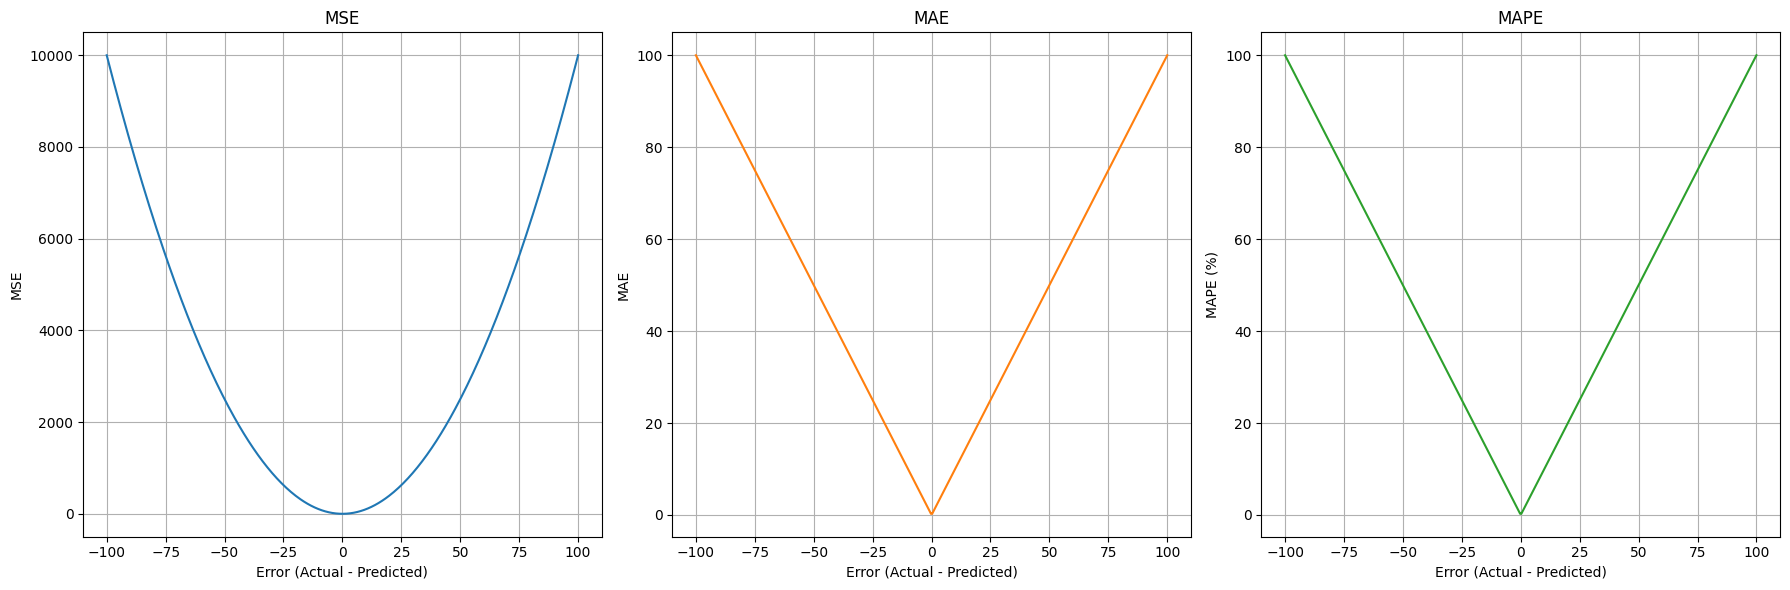

In [5]:
# @title Visualizing MSE, MAE, and MAPE{ display-mode: "form" }
import numpy as np
import matplotlib.pyplot as plt

def mse(actuals, predicted_values):
    return np.mean((actuals - predicted_values) ** 2)

def mae(actuals, predicted_values):
    return np.mean(np.abs(actuals - predicted_values))

def mape(actuals, predicted_values):
     return np.mean(np.abs((actuals - predicted_values) / actuals) * 100)

# Generating a range of errors (negative and positive)
errors = np.linspace(-100, 100, 400)
actuals = np.full_like(errors, 100)  # Fixed true value for illustration
predicted_values = actuals + errors

# Calculating losses
mse_values = [mse(actuals[i], predicted_values[i]) for i in range(len(errors))]
mae_values = [mae(actuals[i], predicted_values[i]) for i in range(len(errors))]
mape_values = [mape(actuals[i], predicted_values[i]) for i in range(len(errors))]

# Plotting in a single figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# MSE Plot
axs[0].plot(errors, mse_values, label='SE Loss', color='C0')
axs[0].set_title('MSE')
axs[0].set_xlabel('Error (Actual - Predicted)')
axs[0].set_ylabel('MSE')
axs[0].grid(True)

# MAE Plot
axs[1].plot(errors, mae_values, label='AE Loss', color='C1')
axs[1].set_title('MAE')
axs[1].set_xlabel('Error (Actual - Predicted)')
axs[1].set_ylabel('MAE')
axs[1].grid(True)

# MAPE Plot
axs[2].plot(errors, mape_values, label='APE Loss', color='C2')
axs[2].set_title('MAPE')
axs[2].set_xlabel('Error (Actual - Predicted)')
axs[2].set_ylabel('MAPE (%)')
axs[2].grid(True)

plt.tight_layout()
plt.show()


## Finding the optimal forecaster

Maybe less known is the fact that if we take one of these forecasting metrics, we can sometimes find the optimal (best) point forecast, meaning that it will minimize the error.

### Optimal forecast for the RMSE and MSE
It is possible to show that the arithmetic mean (expected value) is the forecast that minimizes the Root Mean Squared Error (RMSE) and the Mean Squared Error (MSE).

To find the optimal forecast for the RMSE, it's sufficient to minimize the squared error without the square root, as the square root is a monotonically increasing function. Thus, we can focus on minimizing the Mean Squared Error (MSE).

To find the minimum of the MSE, we differentiate it with respect to $\hat{y}$ and set the derivative equal to zero.

$ \frac{d}{d\hat{y}} \left( \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y})^2 \right) = 0 $

$ \Rightarrow \frac{1}{n} \sum_{i=1}^{n} 2(y_i - \hat{y})(-1) = 0 $

$ \Rightarrow \sum_{i=1}^{n} (y_i - \hat{y}) = 0 $

Now we solve for $\hat{y}$:

$ \Rightarrow \sum_{i=1}^{n} y_i - \sum_{i=1}^{n} \hat{y} = 0 $

$ \Rightarrow \sum_{i=1}^{n} y_i = n\hat{y} $

$ \Rightarrow \hat{y} = \frac{1}{n} \sum_{i=1}^{n} y_i $

This final expression shows that the optimal forecast $\hat{y}$ that minimizes the MSE (and consequently the RMSE) is the arithmetic mean of the actual values $y_i$.

### Optimal forecast for the MAE

Similary, we can show that the median minimizes the MAE.

Let's first consider the Absolute Error (AE):

\begin{equation}
 |y_i - \hat{y}| =
\begin{cases}
y_i - \hat{y} & \text{if } y_i \geq \hat{y} \\
\hat{y} - y_i & \text{if } y_i < \hat{y}
\end{cases}
\end{equation}

Its derivative is

\begin{equation}
 \frac{d}{d\hat{y}}|y_i - \hat{y}| =
\begin{cases}
-1 & \text{if } y_i > \hat{y} \\
1 & \text{if } y_i < \hat{y}
\end{cases}
\end{equation}

Noticing that the derivative at $y_i = \hat{y}$ is indeterminate due to the kink in the absolute value function at zero.

Now, if we get back to minimizing MAE:

$ \frac{d}{d\hat{y}} \left( \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}|\right) = 0 $

$ \Rightarrow \frac{1}{n} \sum_{i=1}^{n} \frac{d}{d\hat{y}}|y_i - \hat{y}| = 0 $

$ \Rightarrow \frac{1}{n} \sum_{i=1}^{n} \frac{d}{d\hat{y}} \begin{cases}
-1 & \text{if } y_i > \hat{y} \\
1 & \text{if } y_i < \hat{y}
\end{cases} = 0 $

The minimization of the MAE occurs where the balance between the number of $y_i$ values above and below $\hat{y}$ equates, which effectively happens at the median of $\{y_i\}$. By definition, the median is the value that divides a dataset into two equal parts, where half of the samples are less than or equal to the median, and half are greater than or equal to the median. This characteristic makes the median the point that minimizes the sum of absolute deviations $(|y_i - \hat{y}|)$, thereby minimizing the MAE.

Unfortunately, we cannot derive an optimal forecast for the MAPE as easily as we did with MSE and MAE. But to gain some more intuition, let's explore the behavior of this metrics in practice.

# Metrics in practice

In [6]:
d = round(sales["R06"][:48]) # to have integer values

In [7]:
# Forecasts
forecast_1 = np.full_like(d, 10) # low demand forecast 10 pieces/week
forecast_2 = np.full_like(d, np.median(d)) # Median demand for a week
forecast_3 = np.full_like(d, np.mean(d)) # Average demand for a week

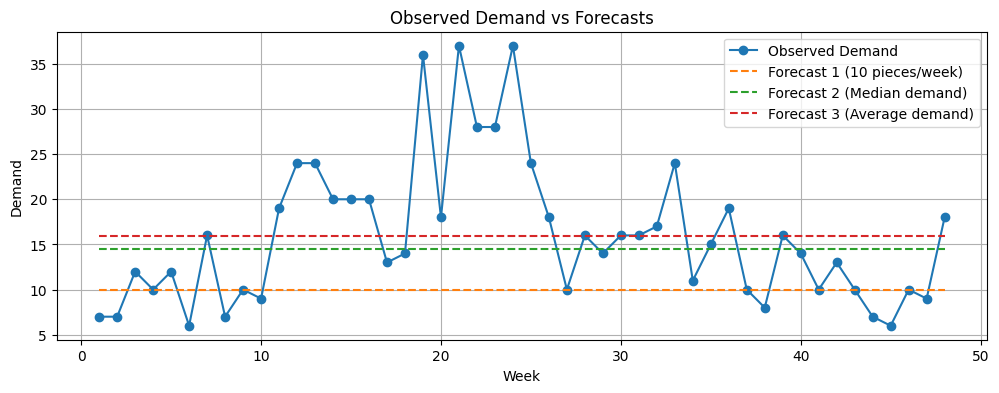

In [8]:
#@title Plot of the demand and forecasts
weeks = np.arange(1, len(d) + 1)
plt.figure(figsize=(12, 4))
plt.plot(weeks, d, 'o-', label='Observed Demand')
plt.plot(weeks, forecast_1, '--', label='Forecast 1 (10 pieces/week)')
plt.plot(weeks, forecast_2, '--', label='Forecast 2 (Median demand)')
plt.plot(weeks, forecast_3, '--', label='Forecast 3 (Average demand)')
plt.xlabel('Week')
plt.ylabel('Demand')
plt.title('Observed Demand vs Forecasts')
plt.legend()
plt.grid(True)
plt.show()

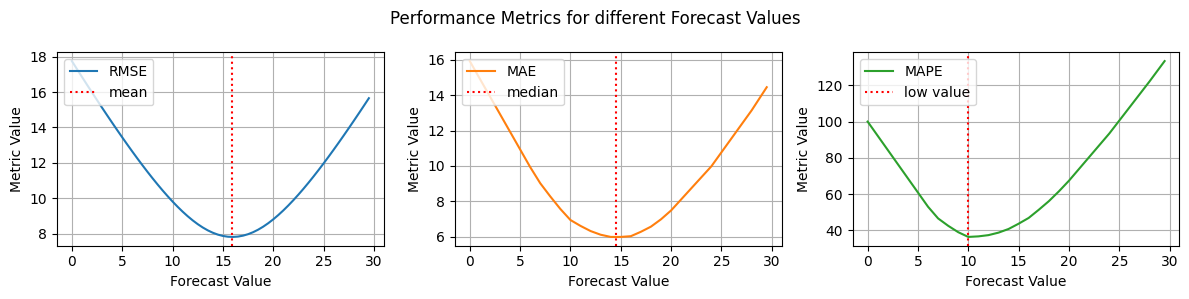

In [9]:
# @title Performance metrics for different forecast values { display-mode: "form" }

# Function to calculate MAPE, MAE, and RMSE
def calculate_metrics(observed, forecast):
    observed, forecast = np.array(observed), np.array(forecast)
    bias = np.mean(forecast - observed)
    mape = np.mean(np.abs((observed - forecast) / observed)) * 100
    mae = np.mean(np.abs(observed - forecast))
    rmse = np.sqrt(np.mean((observed - forecast)**2))
    # return {"bias":round(bias,2),"mape":mape,"mae":mae,"rmse":rmse}
    return {"MAPE":mape,"MAE":mae,"RMSE":rmse}

# Compute the results of the metrics
results = []
x = np.arange(0,30,0.5)
for f in x:
    forecast = np.full_like(d, f)
    results.append(calculate_metrics(d, forecast))
results = pd.DataFrame(results)
results.set_index(x,inplace=True)

# Create the plots
fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharex=True)

metrics = ['RMSE', 'MAE', 'MAPE']
colors = ['C0', 'C1', 'C2']
minimum_values = [forecast_3[0],forecast_2[0],forecast_1[0]]
minimum_labels = ['mean','median','low value']
for ax, metric, minimum, minimum_label, color in zip(axs, metrics, minimum_values, minimum_labels, colors):
    ax.plot(results.index, results[metric], label=metric, color=color)
    ax.axvline(x=minimum, color='r', linestyle=':', label=minimum_label)
    ax.set_ylabel('Metric Value')
    ax.set_xlabel('Forecast Value')
    ax.legend(loc='upper left')
    ax.grid(True)

fig.suptitle('Performance Metrics for different Forecast Values')

plt.tight_layout()
plt.show()


What to notice:
- We can see that all the metrics are convex and have a minimum.
- The minima of RMSE and MAE correspond to the mean and the median, respectively.

In [10]:
# @title Metrics Comparison { display-mode: "form" }
metrics = pd.DataFrame([calculate_metrics(d, forecast) for forecast in (forecast_1,forecast_2,forecast_3)])
metrics["Forecast"] = [f"Forecast 1 (low value={forecast_1[0]:.2f})",f"Forecast 2 (median={forecast_2[0]:.2f})",f"Forecast 3 (mean={forecast_3[0]:.2f})"]
metrics.set_index("Forecast",inplace=True)

def highlight_min(s):
    is_min = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_min]

# Applying the style to the DataFrame
metrics.style.apply(highlight_min)

,MAPE,MAE,RMSE
Forecast,,,
Forecast 1 (low value=10.00),36.383946,6.937500,9.813893
Forecast 2 (median=14.50),42.226558,5.979167,7.945124
Forecast 3 (mean=15.94),46.673228,6.018229,7.814000


Takeaways:
- The goodness of the forecast depends on how we measure the error. There isn't a universally "best" forecast that exists in isolation. The optimal forecast is metric-dependent.
- Forecasts are developed to predict a specific target variable, and in this process, the metric employed to assess the model's accuracy during training is referred to as the loss function. The role of the loss function becomes more pronounced in machine learning-based forecasting systems.
- Alignment between the loss function used during model training and the evaluation metric applied post-training is crucial for optimal performance. A mismatch, such as using a model optimized for MSE (Mean Squared Error) loss but evaluating it with MAPE (Mean Absolute Percentage Error), generally leads to suboptimal performance. This illustrates the importance of consistency in the criteria used for training and evaluation, as it significantly impacts the forecast's effectiveness.

## Performance in Business Problems

So far, we measured the performance of our forecasts with popular forecasting metrics but we have no idea of how good are these forecast in terms of the business value that they can generate.

To assess the quality in terms of the value generated, we need to remembered that the forecast was not our end goal, and describe what is it. This is, to understand the business problem we are trying to solve.

Let's now describe the inventory problem we are trying to solve. To do this, let's come back to the problem that we described in the sequential decision making section.

We will use our forecast ($q$) to decide how many units to stock of a certain product . Each unit has a cost ($c=0.35$) and a selling price ($p=1$). At each period, we observe a demand ($d$) and get a profit equal to $\text{profit} = \min(d,q) * p - q *c $. We want to maximize the average profit over the forecast horizon.


In [11]:
#@title Adding the Avg. Profit to our metrics table
def profit(d,q,p,c,mean=True):
    if sum:
        return np.mean(np.minimum(d, q) * p - q * c)
    else:
        return np.minimum(d, q) * p - q * c

p = 1
c = 0.35

metrics["Avg. Profit"] = [profit(d,forecast_1,p,c),profit(d,forecast_2,p,c),profit(d,forecast_3,p,c)]
metrics

,MAPE,MAE,RMSE,Avg. Profit
Forecast,,,,
Forecast 1 (low value=10.00),36.383946,6.937500,9.813893,6.000000
Forecast 2 (median=14.50),42.226558,5.979167,7.945124,7.154167
Forecast 3 (mean=15.94),46.673228,6.018229,7.814000,7.350260


We see that the mean-based forecast generated the highest profit. But:
- Can we do better?
- How does this new performance evaluation metric relate to the others?
- How variable is the profit over time? Which is the probability of getting a very low profit on any given day?

# Probabilistic Forecasting

Let's see what we can change in order to improve our profit performance.

If we look back into the plots that showed how the MSE, MAE and MAPE penalize the forecast errors, we will notice that the three of them are symmetric. They penalize equally under and over forecasting.

But in our business problem, the penalties we incour when we under and over forecast are different. If we under forecast we lose a marginal revenue of $C_u = p - c = 0.65$ and if we over forecast we incur a marginal cost of $C_o = c = 0.35$.

This means, that we can also re-formulate our problem as minimizing the sum of the costs associated to under and over forecast (and, in consequence, stock).

Minimize
$TC = C_o \cdot \max(Q - D, 0) + C_u \cdot \max(D - Q, 0).$

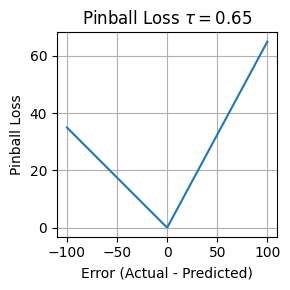

In [12]:
# @title Visualizing the penalties of our business problem { display-mode: "form" }
import numpy as np
import matplotlib.pyplot as plt

def pinball_loss(actuals, predicted_values, tau=0.65):
    error = actuals - predicted_values
    return np.mean(np.where(error >  0, tau * error, (tau - 1) * error))

# Generating a range of errors (negative and positive)
errors = np.linspace(-100, 100, 400)
actuals = errors  # Fixed true value for illustration
predicted_values = np.full_like(errors, 0)

# Calculating losses
pinball_values = [pinball_loss(actuals[i], predicted_values[i]) for i in range(len(errors))]

# Plotting in a single figure with 3 subplots
fig, ax = plt.subplots(figsize=(3, 3))

# Pinball Plot
ax.plot(errors, pinball_values, label='Pinball Loss', color='C0')
ax.set_title(r'Pinball Loss $\tau=0.65$')
ax.set_xlabel('Error (Actual - Predicted)')
ax.set_ylabel('Pinball Loss')
ax.grid(True)

plt.tight_layout()
plt.show()


To minimize the expected cost, we need to balance the expected $C_o$ with the expected $C_u$. For a certain $q$, the probability of overstocking is given by $P(D\leq q)$ the probability of $d$ being lower or equal to $q$, and the probability of understocking is given by $1-P(D\leq q)$.
So we want to find the $q^*$ that makes:
$P(D\leq q^*) . C_o = (1-P(D\leq q)) . C_u $.

Rearreging the terms we get:

$P(D\leq q^*) = \frac{C_u}{C_o+C_u} = \frac{p-c}{p} = 0.65$

This last formula is known as the critical fractile formula.



An informal definition of a quantile:

The $p$-quantile of a random variable $X$, is the smallest $k$ such as the $P(X\leq k) \geq p$ with $p \in[0,1]$.

So, basically, to minimize the cost and maximize the profit we need to be able to forecast that specific quantile that balance our expected costs.

In [13]:
# Critical fractile formula
def cf(d,p,c):
    return np.percentile(d,((p-c)/p)*100)

forecast_4 = np.full_like(d, cf(d,p,c))
average_profit = profit(d,forecast_4,p,c)
average_cost = pinball_loss(d,forecast_4,0.65)

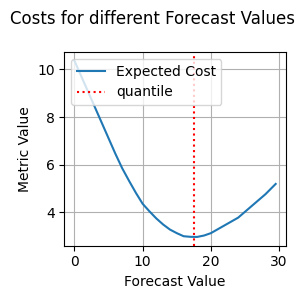

In [14]:
#@title Plot of the expected cost with the vertical line on the quantile.
costs = []
x = np.arange(0,30,0.5)
for f in x:
    forecast = np.full_like(d, f)
    costs.append(pinball_loss(d,forecast,tau=0.65))
costs = pd.DataFrame({"Expected Cost":costs})
costs.set_index(x,inplace=True)

# Create the plots
fig, ax = plt.subplots(figsize=(3, 3))

ax.plot(costs.index, costs["Expected Cost"], label="Expected Cost", color="C0")
ax.axvline(x=forecast_4[0], color='r', linestyle=':', label="quantile")
ax.set_ylabel('Metric Value')
ax.set_xlabel('Forecast Value')
ax.legend(loc='upper left')
ax.grid(True)

fig.suptitle('Costs for different Forecast Values')

plt.tight_layout()
plt.show()

Actually, this asymmetric linear penalty that we have been using, has a name. It is known as the pinball loss.

And the $p$-quantile is the optimal forecast for pinball loss.[4]

In [15]:
#@title Adding Forecast 4 to our table
tau = 0.65
metrics["Pinball"] = [pinball_loss(d,forecast_1,tau),pinball_loss(d,forecast_2,tau),pinball_loss(d,forecast_3,tau)]
row_4 = calculate_metrics(d, forecast_4)
row_4["Avg. Profit"] = profit(d,forecast_4,p,c)
row_4["Pinball"] = pinball_loss(d,forecast_4,0.65)
new_row = pd.Series(row_4, name=f"Forecast 4 (quantile={forecast_4[0]:.2f})")
metrics = metrics.append(new_row)
metrics


<ipython-input-15-8ecd76ae9c1e>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append(new_row)


,MAPE,MAE,RMSE,Avg. Profit,Pinball
Forecast,,,,,
Forecast 1 (low value=10.00),36.383946,6.937500,9.813893,6.000000,4.359375
Forecast 2 (median=14.50),42.226558,5.979167,7.945124,7.154167,3.205208
Forecast 3 (mean=15.94),46.673228,6.018229,7.814000,7.350260,3.009115
Forecast 4 (quantile=17.55),53.970062,6.431250,7.978643,7.385625,2.973750


Note that our optimal forecast for the business problem results in a significant Mean Absolute Percentage Error (MAPE).

Takeaways:
- We discover that the maximization of the profit, was equivalent to the minimization of the cost.
- This cost happened to be the same as a known loss, the pinball loss, which we then treated similarly to the previous metrics and found the optimal forecast for it.
- Once again, we saw how important is to ensure that the forecast loss and evaluation are aligned.
- Finally, we saw that popular metrics like MAPE can be very bad for business problems.

So far we leverage only 1 $p$-quantile, the one that minimized the cost. But we can also construct prediction intervals by forecasting pairs of quantiles. Prediction intervals can provide a better understanding of the variability of our variable of interest.

## Types of Probabilistic Forecasts

In its most powerful version, a probabilistic forecast provides a predictive probability distribution over future quantities or events of interest.[5]

Specifically, for a time series $z_1, z_2, \ldots , z_{T}$, the probabilistic forecast gives the predictive distribution $P(z_{T+1}, z_{T+2}, \ldots , z_{T+h}|z_1, z_2, \ldots , z_{T})$ that fully characterize the predictive uncertainty.[6]

However, since the joint distribution is typically intractable, in practice, it is more common to construct predictive intervals using quantiles from the marginal predictive distribution for each forecast horizon.

These quantiles are sometimes estimated by using Monte Carlo sample paths from the joint predictive distribution.

Lastly, an alternative method involves assuming a parametric form for the distribution and estimating its parameters.

By leveraging any of this objects we can answer many different questions that would be impossible to tackle with a point forecast that does not consider any probabilistic aspect of our variable of interest.

Warning: We should not confuse prediction intervals with confidence intervals or credible intervals.[7]




# References

[1] [Vandeput, N. (2023). Demand forecasting best practices. Manning Publications.](https://www.manning.com/books/demand-forecasting-best-practices)  
[2] [Gilliland, M. (2021) Business forecasting: The emerging role of Artificial Intelligence and machine learning. Hoboken, NJ: Wiley.](https://onlinelibrary.wiley.com/doi/book/10.1002/9781119782605#page=185)     
[3] [Powell, W. B. (2022). Reinforcement learning and stochastic optimization: A unified framework for sequential decisions. Wiley.](https://castle.princeton.edu/rlso/)  
[4] [Gneiting, T. (2011). Quantiles as Optimal Point forecasts. International Journal of Forecasting, 27(2), 197–207. https://doi.org/10.1016/j.ijforecast.2009.12.015 ](https://www.annualreviews.org/content/journals/10.1146/annurev-statistics-062713-085831#right-ref-B5)  
[5] [Haben, S., Holderbaum, W. and Voss, M. (2023) Core concepts and methods in load forecasting: With applications in Distribution Networks. Springer International. ](https://library.oapen.org/bitstream/handle/20.500.12657/63002/978-3-031-27852-5.pdf?sequence=1&isAllowed=y)   
[6] [Januschowski, T., Gasthaus, J., Wang, Y., Salinas, D., Flunkert, V., Bohlke-Schneider, M., & Callot, L. (2020). Criteria for classifying forecasting methods. International Journal of Forecasting, 36(1), 167–177. https://doi.org/10.1016/j.ijforecast.2019.05.008](https://www.sciencedirect.com/science/article/abs/pii/S0169207019301529)   
[7] https://robjhyndman.com/hyndsight/intervals/  